**ADM Assignment 3**

**Nouman Ahmad Khan**

**Kashif Iqbal**

---




*   import libraries

1.   Decision Tree classifier
2.   Logistic Regression
3.   Naive Bayes Classifieer

for each of given classifiers, we performed followings:

*   Accuracy, precision, Recall, F1 score, confusion matrix
*   Bias-Variance vs Accuracy plot
*   Bias-Variance vs Error plot
*   Training-Testing Error vs Mean sq error plot





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, mean_squared_error

In [ ]:
df=pd.read_csv('final-data.csv')
df.head()

,wmc,dit,noc,cbo,rfc,lcom,loc,bug
0,-0.319049,0.821315,-0.19971,-0.182214,-0.456978,-0.151546,-0.420162,0
1,-0.408342,-0.749684,-0.19971,-0.359872,-0.657008,-0.143905,-0.567477,0
2,-0.497634,-0.749684,-0.19971,-0.226629,-0.737019,-0.145815,-0.646800,0
3,-0.676220,-0.749684,-0.19971,-0.493116,-0.777025,-0.151546,-0.612805,0
4,-0.765513,-0.749684,-0.19971,-0.493116,-0.857037,-0.151546,-0.663798,0


**Decision Tree Classifier**

In [ ]:
X = df.drop('bug', axis=1)  # Features
y = df['bug']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.86
Precision: 0.49
Recall: 0.50
F1 Score: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4697
           1       0.49      0.50      0.49       748

    accuracy                           0.86      5445
   macro avg       0.71      0.71      0.71      5445
weighted avg       0.86      0.86      0.86      5445

Confusion Matrix:
[[4316  381]
 [ 377  371]]


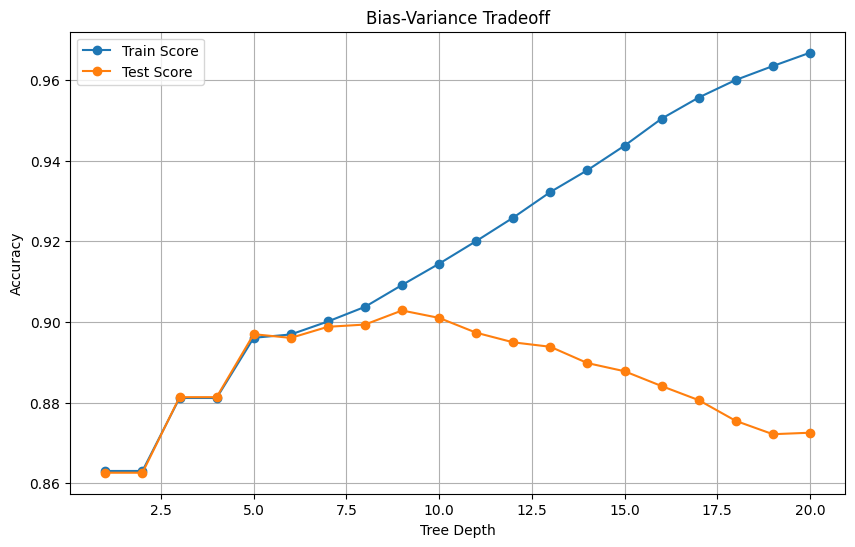

Cross-validation scores: [0.86170799 0.82751653 0.81667891 0.70297575 0.44470977]
Mean cross-validation score: 0.73
Variance of cross-validation score: 0.02


In [ ]:
# Bias-Variance Analysis
train_scores = []
test_scores = []
max_depths = range(1, 21)

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Train Score', marker='o')
plt.plot(max_depths, test_scores, label='Test Score', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
plt.show()

# Cross-validation to estimate variance
cross_val_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=5)
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Mean cross-validation score: {np.mean(cross_val_scores):.2f}')
print(f'Variance of cross-validation score: {np.var(cross_val_scores):.2f}')

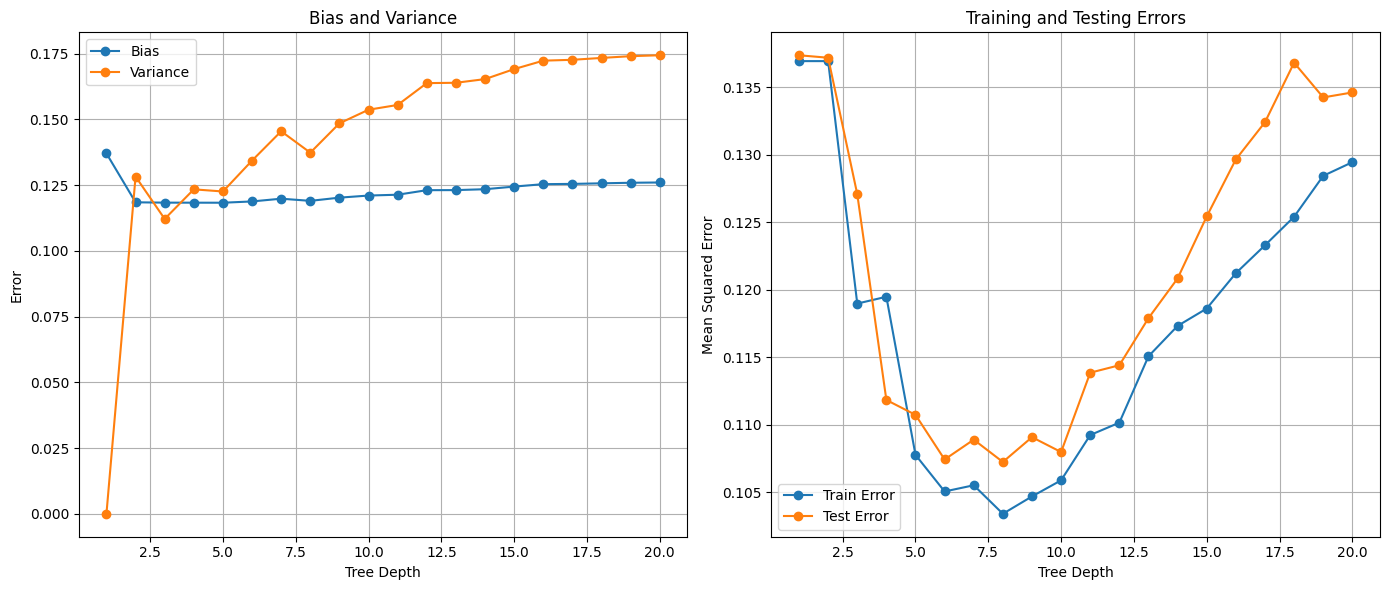

Depth: 1, Bias: 0.1370, Variance: 0.0000
Depth: 2, Bias: 0.1184, Variance: 0.1282
Depth: 3, Bias: 0.1183, Variance: 0.1121
Depth: 4, Bias: 0.1183, Variance: 0.1234
Depth: 5, Bias: 0.1183, Variance: 0.1226
Depth: 6, Bias: 0.1188, Variance: 0.1343
Depth: 7, Bias: 0.1198, Variance: 0.1455
Depth: 8, Bias: 0.1190, Variance: 0.1373
Depth: 9, Bias: 0.1202, Variance: 0.1485
Depth: 10, Bias: 0.1210, Variance: 0.1536
Depth: 11, Bias: 0.1213, Variance: 0.1555
Depth: 12, Bias: 0.1231, Variance: 0.1638
Depth: 13, Bias: 0.1231, Variance: 0.1639
Depth: 14, Bias: 0.1234, Variance: 0.1653
Depth: 15, Bias: 0.1244, Variance: 0.1691
Depth: 16, Bias: 0.1253, Variance: 0.1723
Depth: 17, Bias: 0.1254, Variance: 0.1726
Depth: 18, Bias: 0.1257, Variance: 0.1733
Depth: 19, Bias: 0.1259, Variance: 0.1740
Depth: 20, Bias: 0.1260, Variance: 0.1744


In [ ]:
df=pd.read_csv('final-data.csv')
# Separating the features and the target
X = df.drop('bug', axis=1)
y = df['bug']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_depths = range(1, 21)
train_errors = []
test_errors = []
mean_predictions = []
variance_values = []
bias_values = []

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    # Cross-validation predictions
    y_train_pred = cross_val_predict(clf, X_train, y_train, cv=5)
    y_test_pred = cross_val_predict(clf, X_test, y_test, cv=5)

    # Train and test errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append train and test errors
    train_errors.append(train_error)
    test_errors.append(test_error)

    # Mean prediction for bias-variance calculation
    y_pred_mean = np.mean(cross_val_predict(clf, X, y, cv=5))

    # Variance calculation
    variance = np.mean((cross_val_predict(clf, X, y, cv=5) - y_pred_mean) ** 2)
    variance_values.append(variance)

    # Bias calculation
    bias = np.mean((y - y_pred_mean) ** 2)
    bias_values.append(bias)

# Plotting the results
plt.figure(figsize=(14, 6))

# Bias and Variance plot
plt.subplot(1, 2, 1)
plt.plot(max_depths, bias_values, label='Bias', marker='o')
plt.plot(max_depths, variance_values, label='Variance', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Error')
plt.title('Bias and Variance')
plt.legend()
plt.grid(True)

# Training and Testing Errors plot
plt.subplot(1, 2, 2)
plt.plot(max_depths, train_errors, label='Train Error', marker='o')
plt.plot(max_depths, test_errors, label='Test Error', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Printing the bias and variance values for inspection
for depth, bias, variance in zip(max_depths, bias_values, variance_values):
    print(f'Depth: {depth}, Bias: {bias:.4f}, Variance: {variance:.4f}')

**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
df=pd.read_csv('final-data.csv')

# Separating the features and the target
X = df.drop('bug', axis=1)  # Features
y = df['bug']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Logistic Regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.86
Precision: 0.45
Recall: 0.05
F1 Score: 0.10
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      4697
           1       0.45      0.05      0.10       748

    accuracy                           0.86      5445
   macro avg       0.66      0.52      0.51      5445
weighted avg       0.81      0.86      0.81      5445

Confusion Matrix:
[[4649   48]
 [ 708   40]]


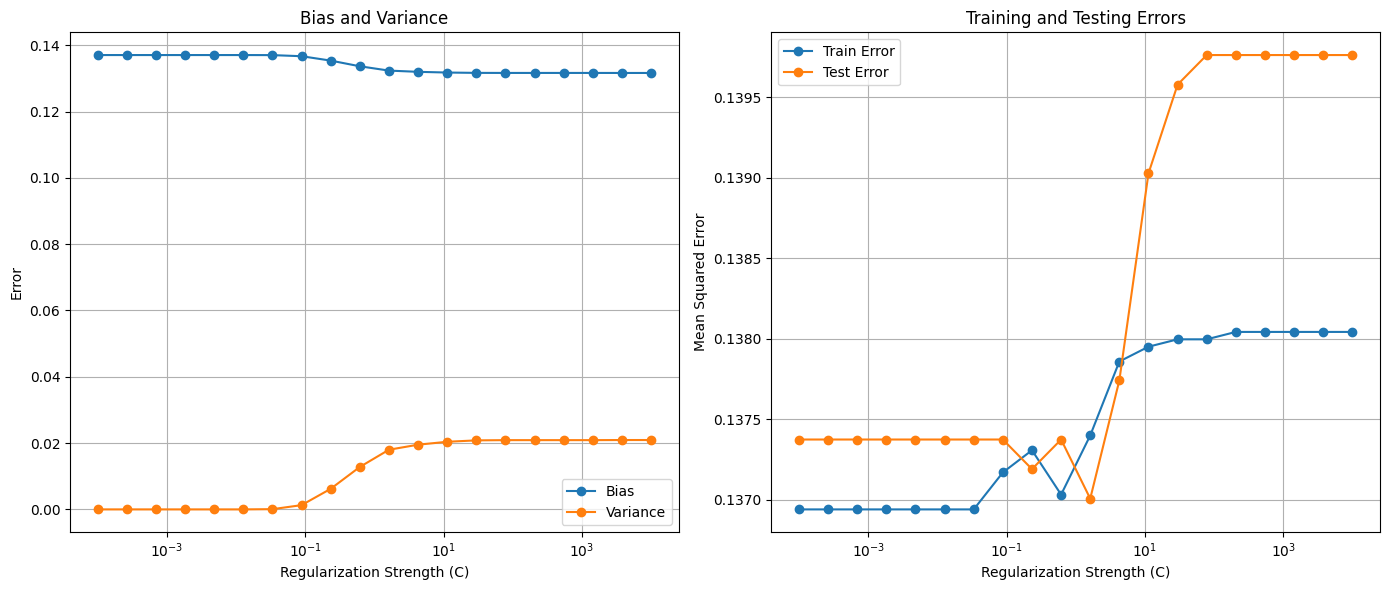

C: 0.0001, Bias: 0.1370, Variance: 0.0000
C: 0.0003, Bias: 0.1370, Variance: 0.0000
C: 0.0007, Bias: 0.1370, Variance: 0.0000
C: 0.0018, Bias: 0.1370, Variance: 0.0000
C: 0.0048, Bias: 0.1370, Variance: 0.0000
C: 0.0127, Bias: 0.1370, Variance: 0.0000
C: 0.0336, Bias: 0.1370, Variance: 0.0001
C: 0.0886, Bias: 0.1367, Variance: 0.0013
C: 0.2336, Bias: 0.1354, Variance: 0.0062
C: 0.6158, Bias: 0.1336, Variance: 0.0128
C: 1.6238, Bias: 0.1323, Variance: 0.0180
C: 4.2813, Bias: 0.1320, Variance: 0.0195
C: 11.2884, Bias: 0.1318, Variance: 0.0204
C: 29.7635, Bias: 0.1316, Variance: 0.0208
C: 78.4760, Bias: 0.1316, Variance: 0.0209
C: 206.9138, Bias: 0.1316, Variance: 0.0209
C: 545.5595, Bias: 0.1316, Variance: 0.0209
C: 1438.4499, Bias: 0.1316, Variance: 0.0209
C: 3792.6902, Bias: 0.1316, Variance: 0.0209
C: 10000.0000, Bias: 0.1316, Variance: 0.0209


In [ ]:
df=pd.read_csv('final-data.csv')

X = df.drop('bug', axis=1)
y = df['bug']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bias-Variance Analysis
train_errors = []
test_errors = []
mean_predictions = []
variance_values = []
bias_values = []
C_values = np.logspace(-4, 4, 20)  # Different values of regularization strength

for C in C_values:
    clf = LogisticRegression(C=C, random_state=42, max_iter=10000)

    # Cross-validation predictions
    y_train_pred = cross_val_predict(clf, X_train, y_train, cv=5)
    y_test_pred = cross_val_predict(clf, X_test, y_test, cv=5)

    # Train and test errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append train and test errors
    train_errors.append(train_error)
    test_errors.append(test_error)

    # Mean prediction for bias-variance calculation
    y_pred_mean = np.mean(cross_val_predict(clf, X, y, cv=5))

    # Variance calculation
    variance = np.mean((cross_val_predict(clf, X, y, cv=5) - y_pred_mean) ** 2)
    variance_values.append(variance)

    # Bias calculation
    bias = np.mean((y - y_pred_mean) ** 2)
    bias_values.append(bias)

# Plotting the results
plt.figure(figsize=(14, 6))

# Bias and Variance plot
plt.subplot(1, 2, 1)
plt.plot(C_values, bias_values, label='Bias', marker='o')
plt.plot(C_values, variance_values, label='Variance', marker='o')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Error')
plt.title('Bias and Variance')
plt.legend()
plt.grid(True)

# Training and Testing Errors plot
plt.subplot(1, 2, 2)
plt.plot(C_values, train_errors, label='Train Error', marker='o')
plt.plot(C_values, test_errors, label='Test Error', marker='o')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Printing the bias and variance values for inspection
for C, bias, variance in zip(C_values, bias_values, variance_values):
    print(f'C: {C:.4f}, Bias: {bias:.4f}, Variance: {variance:.4f}')

**Naive Bayes Classification**

Accuracy: 0.84
Precision: 0.32
Recall: 0.18
F1 Score: 0.23
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4697
           1       0.32      0.18      0.23       748

    accuracy                           0.84      5445
   macro avg       0.60      0.56      0.57      5445
weighted avg       0.80      0.84      0.81      5445

Confusion Matrix:
[[4422  275]
 [ 617  131]]


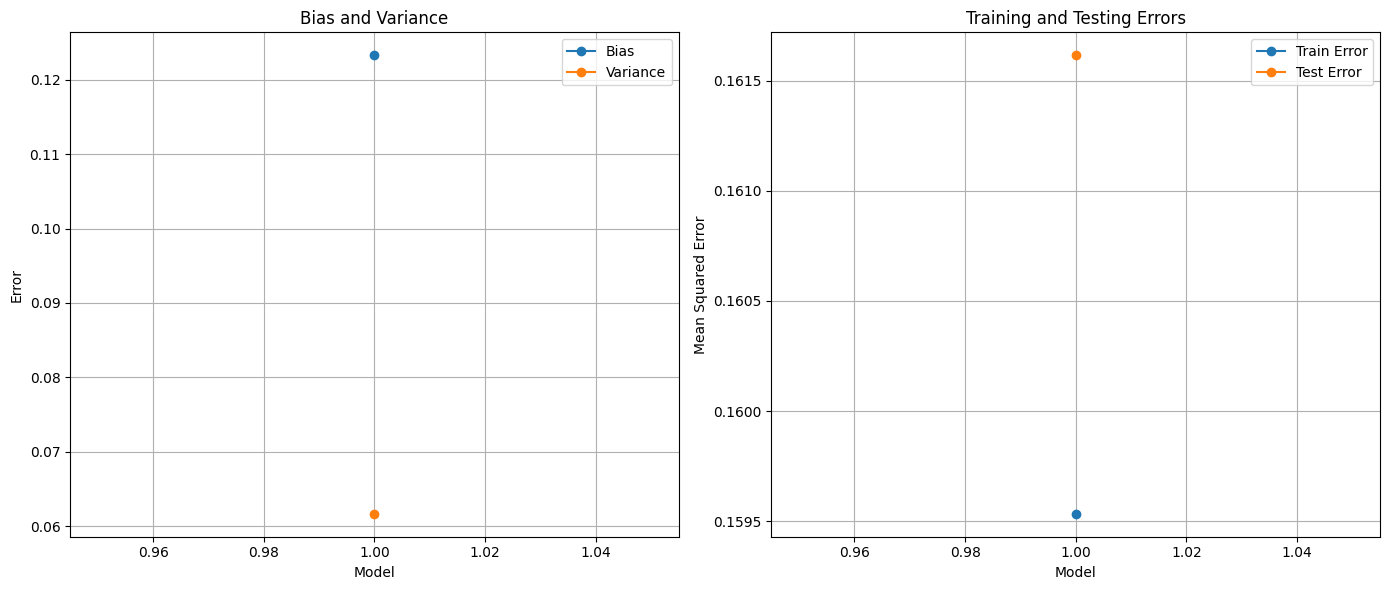

Bias: 0.1233, Variance: 0.0617


In [ ]:
from sklearn.naive_bayes import GaussianNB

df=pd.read_csv('final-data.csv')

# Separating the features and the target
X = df.drop('bug', axis=1)
y = df['bug']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Bias-Variance Analysis
train_errors = []
test_errors = []
mean_predictions = []
variance_values = []
bias_values = []

# Perform cross-validation to get predictions for bias-variance analysis
y_pred_cross = cross_val_predict(clf, X, y, cv=5)
y_pred_train_cross = cross_val_predict(clf, X_train, y_train, cv=5)
y_pred_test_cross = cross_val_predict(clf, X_test, y_test, cv=5)

# Training and testing errors
train_error = mean_squared_error(y_train, y_pred_train_cross)
test_error = mean_squared_error(y_test, y_pred_test_cross)

train_errors.append(train_error)
test_errors.append(test_error)

# Mean prediction for bias-variance calculation
y_pred_mean = np.mean(y_pred_cross)

# Variance calculation
variance = np.mean((y_pred_cross - y_pred_mean) ** 2)
variance_values.append(variance)

# Bias calculation
bias = np.mean((y - y_pred_mean) ** 2)
bias_values.append(bias)

# Plotting the results
plt.figure(figsize=(14, 6))

# Bias and Variance plot
plt.subplot(1, 2, 1)
plt.plot([1], bias_values, label='Bias', marker='o')
plt.plot([1], variance_values, label='Variance', marker='o')
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Bias and Variance')
plt.legend()
plt.grid(True)

# Training and Testing Errors plot
plt.subplot(1, 2, 2)
plt.plot([1], train_errors, label='Train Error', marker='o')
plt.plot([1], test_errors, label='Test Error', marker='o')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Printing the bias and variance values for inspection
print(f'Bias: {bias_values[0]:.4f}, Variance: {variance_values[0]:.4f}')